In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


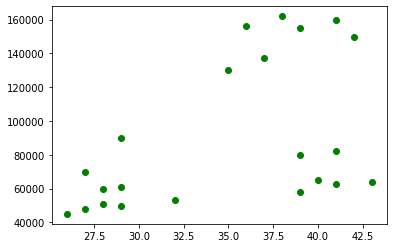

In [3]:
plt.scatter(df['Age'],df['Income($)'],color='green')

In [4]:
km = KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


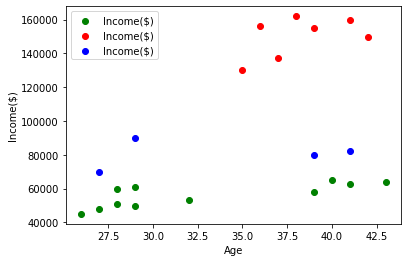

In [7]:
plt.scatter(df[df.cluster==0]['Age'],df[df.cluster==0]['Income($)'],color='green')
plt.scatter(df[df.cluster==1]['Age'],df[df.cluster==1]['Income($)'],color='red')
plt.scatter(df[df.cluster==2]['Age'],df[df.cluster==2]['Income($)'],color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend(['Income($)','Income($)','Income($)'])

In [8]:
scaler = MinMaxScaler()

In [9]:
scaler.fit(df[['Income($)']])
df[['Income($)']] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [10]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


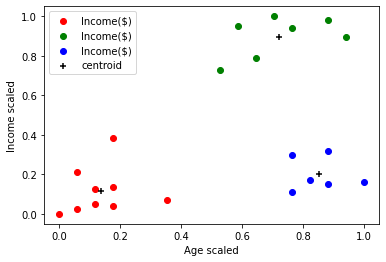

In [11]:
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(df[df.cluster==i]['Age'],df[df.cluster==i]['Income($)'],color=colors[i])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='+')
plt.xlabel('Age scaled')
plt.ylabel('Income scaled')
plt.legend(['Income($)','Income($)','Income($)','centroid'])

In [12]:
sse = []
for n_cluster in range(1,11):
    km = KMeans(n_clusters=n_cluster)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2766936276300279,
 0.21055478995472496,
 0.17462386586687895,
 0.1327661931978319,
 0.10188787724979426,
 0.08911561350120487]

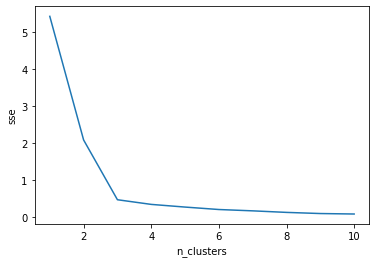

In [13]:
plt.xlabel('n_clusters')
plt.ylabel('sse')
plt.plot(range(1,11),sse)